# Proyek Analisis Data [Bike Sharing Dataset]

- Name : [Awang Muhammad Novandra Arissaputra]
- Email : [ML-11]
- ID Dicoding : [novandrarsptra]

# Question

1. Bagaimana tren penggunaan layanan bike sharing selama beberapa tahun terakhir, serta bagaimana pola penggunaannya berdasarkan waktu dan hari dalam seminggu?

2. Apakah faktor cuaca, seperti musim dan suhu udara, memiliki dampak pada penggunaan layanan bike sharing?

# Importing Library


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [3]:
day_df = "https://raw.githubusercontent.com/Novandra7/dicoding_project_akhir/refs/heads/main/day.csv"
hour_df = "https://raw.githubusercontent.com/Novandra7/dicoding_project_akhir/refs/heads/main/hour.csv"

day_df = pd.read_csv(day_df)
hour_df = pd.read_csv(hour_df)

In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

mengecek didalam dataset apakah terdapat missing value,duplicate value dan outliers

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Jumlah duplikasi day_df :", day_df.duplicated().sum())
print("Jumlah duplikasi hour_df :", hour_df.duplicated().sum())

Jumlah duplikasi day_df : 0
Jumlah duplikasi hour_df : 0


## Cleaning Data

### Day Dataframe

menghapus kolom hari Iibur karena informasi pada kolom tersebut sudah terwakili pada kolom hari kerja

In [9]:
day_df.drop(['holiday'], axis=1, inplace=True)

mengubah nama kolom agar dapat lebih mudah dipahami.

In [10]:
day_df.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'weekday':'day', 'weathersit':'weather',
                    'temp':'temperature', 'atemp':'temperature_feel', 'hum':'humidity', 'casual':'casual_user',
                    'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

mengubah tipe data `date` menjadi datetime64 yang sebelumnya adalah Object

In [11]:
datetime_columns = ['date']

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   date              731 non-null    datetime64[ns]
 2   season            731 non-null    int64         
 3   year              731 non-null    int64         
 4   month             731 non-null    int64         
 5   day               731 non-null    int64         
 6   workingday        731 non-null    int64         
 7   weather           731 non-null    int64         
 8   temperature       731 non-null    float64       
 9   temperature_feel  731 non-null    float64       
 10  humidity          731 non-null    float64       
 11  windspeed         731 non-null    float64       
 12  casual_user       731 non-null    int64         
 13  registered_user   731 non-null    int64         
 14  total_user        731 non-

beberapa sel dibawah berguna untuk mengubah nilai/value dari setiap kolom yang sebelunya bernilai numerik agar mempermudah/memperjelas analisis data.

In [13]:
def change_season(x):
    if x == 1:
        return 'springer'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'

day_df['season'] = day_df['season'].apply(change_season)
day_df.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

day_df['year'] = day_df['year'].apply(change_year)
day_df.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
month_change = {1: 'january', 2: 'february', 3: 'march', 4:'april', 5:'may', 6:'june', 7:'july',
                8:'august', 9:'september', 10:'october', 11:'november', 12:'december'}

day_df['month'] = day_df['month'].map(month_change)
day_df.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
day_change = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'saturday', 6:'sunday'}

day_df['day'] = day_df['day'].map(day_change)
day_df.head(5)

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,sunday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,monday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,tuesday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,wednesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,thursday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
def change_workingday(x):
    if x == 0:
        return 'weekend/holiday'
    else:
        return 'working day'

day_df['workingday'] = day_df['workingday'].apply(change_workingday)
day_df.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,sunday,weekend/holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,monday,weekend/holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,tuesday,working day,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,wednesday,working day,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,thursday,working day,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
def change_weather(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x == 3:
        return 'light snow'
    else:
        return 'heavy rain'

day_df['weather'] = day_df['weather'].apply(change_weather)
day_df.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,sunday,weekend/holiday,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,monday,weekend/holiday,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,tuesday,working day,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,wednesday,working day,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,thursday,working day,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Hour Dataframe

menghapus kolom hari Iibur karena informasi pada kolom tersebut sudah terwakili pada kolom hari kerja

In [19]:
hour_df.drop(['holiday'], axis=1, inplace=True)

mengubah nama kolom agar dapat lebih mudah dipahami.

In [20]:
hour_df.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour', 'weekday':'day', 'weathersit':'weather',
                    'temp':'temperature', 'atemp':'temperature_feel', 'hum':'humidity', 'casual':'casual_user',
                    'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

mengubah tipe data `date` menjadi datetime64 yang sebelumnya adalah Object

In [21]:
datetime_columns = ['date']

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [22]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   date              17379 non-null  datetime64[ns]
 2   season            17379 non-null  int64         
 3   year              17379 non-null  int64         
 4   month             17379 non-null  int64         
 5   hour              17379 non-null  int64         
 6   day               17379 non-null  int64         
 7   workingday        17379 non-null  int64         
 8   weather           17379 non-null  int64         
 9   temperature       17379 non-null  float64       
 10  temperature_feel  17379 non-null  float64       
 11  humidity          17379 non-null  float64       
 12  windspeed         17379 non-null  float64       
 13  casual_user       17379 non-null  int64         
 14  registered_user   1737

beberapa sel dibawah berguna untuk mengubah nilai/value dari setiap kolom yang sebelunya bernilai numerik agar mempermudah/memperjelas analisis data.

In [23]:
def change_season(x):
    if x == 1:
        return 'springer'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'

hour_df['season'] = hour_df['season'].apply(change_season)
hour_df.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,0,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,0,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,0,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,0,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [24]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

hour_df['year'] = hour_df['year'].apply(change_year)
hour_df.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [25]:
month_change = {1: 'january', 2: 'february', 3: 'march', 4:'april', 5:'may', 6:'june', 7:'july',
                8:'august', 9:'september', 10:'october', 11:'november', 12:'december'}

hour_df['month'] = hour_df['month'].map(month_change)
hour_df.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
day_change = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'saturday', 6:'sunday'}

hour_df['day'] = hour_df['day'].map(day_change)
hour_df.head(5)

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,sunday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,sunday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,sunday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,sunday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,sunday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [27]:
def change_workingday(x):
    if x == 0:
        return 'weekend/holiday'
    else:
        return 'working day'

hour_df['workingday'] = hour_df['workingday'].apply(change_workingday)
hour_df.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,sunday,weekend/holiday,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,sunday,weekend/holiday,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,sunday,weekend/holiday,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,sunday,weekend/holiday,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,sunday,weekend/holiday,1,0.24,0.2879,0.75,0.0,0,1,1


In [28]:
def change_weather(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x == 3:
        return 'light snow'
    else:
        return 'heavy rain'

hour_df['weather'] = hour_df['weather'].apply(change_weather)
hour_df.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,sunday,weekend/holiday,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,sunday,weekend/holiday,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,sunday,weekend/holiday,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,sunday,weekend/holiday,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,sunday,weekend/holiday,clear,0.24,0.2879,0.75,0.0,0,1,1


# Exploratory Data Analysis

## Day Dataframe

### Eksplorasi Parameter Statistik

In [29]:
day_df.describe(include='all')

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,731.000000,731,731,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,january,sunday,working day,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari data di atas terlihat bahwa pengguna lebih sering menggunakan Bike Sharing pada musim gugur.

In [30]:
numeric_df = day_df.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()

correlation_matrix


,instant,year,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
instant,1.000000,0.866025,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
year,0.866025,1.000000,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
temperature,0.150580,0.047604,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
temperature_feel,0.152638,0.046106,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
humidity,0.016375,-0.110651,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.011817,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual_user,0.275255,0.248546,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered_user,0.659623,0.594248,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
total_user,0.628830,0.566710,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


### Mengelompokkan Data

In [31]:
day_df.groupby(by="day").agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user                     \
          nunique         sum             sum        max   min         mean   
day                                                                           
friday        104       61460          423935       7804   431  4667.259615   
monday        105      140521          303506       8227   605  4228.828571   
saturday      104       78238          409552       8362  1167  4690.288462   
sunday        105      153852          323955       8714   627  4550.542857   
thursday      104       57319          415729       8173   441  4548.538462   
tuesday       105       70784          384719       7525    22  4338.123810   
wednesday     104       57843          411266       7767   683  4510.663462   

                   
              sum  
day                
friday     485395  
monday     444027  
saturday   487790  
sunday     477807  
thursday   473048  
tuesday    455503  
wednesday  469109

Berdasarkan hari, pengguna Bike Sharing terbanyak berada pada hari Sabtu dengan rata-rata jumlah pengguna sebanyak 4690.288 orang.

In [32]:
day_df.groupby(by=["year", "month"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user        \
               nunique         sum             sum        max   min   
year month                                                            
2011 april          30       22346           72524       5312   795   
     august         31       28842          107849       5895  1115   
     december       31        8448           78875       3940   705   
     february       28        6242           41973       2927  1005   
     january        31        3073           35116       1985   431   
     july           31       36452          104889       6043  3285   
     june           30       30612          112900       5515  3767   
     march          31       12826           51219       3239   605   
     may            31       31050          104771       5805  2633   
     november       30       15594           86573       4486  1495   
     october        31       25222           98289       5511   627   
     september      30       26545          100873       5423  1842   
2012 april          30       38456          135768       7460  1027   
     august         31       43197          171306       7865  4549   
     december       31       13245          110468       6606   441   
     february       29        8721           94416       5062  1529   
     january        31        8969           87775       4521  1301   
     july           31       41705          161902       8173  4459   
     june           30       43294          159536       8120  4127   
     march          31       31618          133257       8362  3194   
     may            31       44235          151630       8294  2843   
     november       30       21009          131655       6852  2277   
     october        31       34538          164303       8156    22   
     september      30       43778          174795       8714  4073   

                                     
                       mean     sum  
year month                           
2011 april      3162.333333   94870  
     august     4409.387097  136691  
     december   2816.870968   87323  
     february   1721.964286   48215  
     january    1231.903226   38189  
     july       4559.387097  141341  
     june       4783.733333  143512  
     march      2065.967742   64045  
     may        4381.322581  135821  
     november   3405.566667  102167  
     october    3984.225806  123511  
     september  4247.266667  127418  
2012 april      5807.466667  174224  
     august     6919.451613  214503  
     december   3990.741935  123713  
     february   3556.448276  103137  
     january    3120.774194   96744  
     july       6567.967742  203607  
     june       6761.000000  202830  
     march      5318.548387  164875  
     may        6318.225806  195865  
     november   5088.800000  152664  
     october    6414.225806  198841  
     september  7285.766667  218573

Pada tahun 2011 pengguna Bike Sharing terbanyak berada pada bulan Juni dengan jumlah 143512 pengguna. Pada tahun 2012 pengguna Bike Sharing terbanyak berada pada bulan September dengan jumlah 218573 pengguna

## Hour Dataframe

### Eksplorasi Parameter Statistik

In [33]:
hour_df.describe(include='all')

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,july,NaN,sunday,working day,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari data di atas terlihat bahwa pengguna lebih sering menggunakan Bike Sharing pada musim gugur.

In [34]:
numeric_df = day_df.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()

correlation_matrix


,instant,year,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
instant,1.000000,0.866025,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
year,0.866025,1.000000,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
temperature,0.150580,0.047604,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
temperature_feel,0.152638,0.046106,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
humidity,0.016375,-0.110651,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.011817,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual_user,0.275255,0.248546,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered_user,0.659623,0.594248,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
total_user,0.628830,0.566710,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


### Mengelompokkan Data

In [35]:
hour_df.groupby(by=["workingday", "hour"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user      \
                     nunique         sum             sum        max min   
workingday      hour                                                      
weekend/holiday 0        230        3829           17055        249   6   
                1        230        2876           13111        168   4   
                2        228        2371            9752        132   2   
                3        227        1465            4386         79   2   
                4        227         514            1362         28   1   
                5        222         383            1546         55   1   
                6        229         875            3417        133   1   
                7        231        1988            8039        387   1   
                8        231        4718           19688        597   5   
                9        231       10399           29246        397  14   
                10       231       18311           40804        539  12   
                11       231       24637           48201        663  27   
                12       231       29163           55443        776  32   
                13       231       31514           54587        760  30   
                14       231       32246           51987        750  23   
                15       231       31532           51354        750   7   
                16       231       29710           51770        783  11   
                17       231       25829           48911        731  15   
                18       230       19371           45272        676  23   
                19       230       15076           38209        554  11   
                20       230       10756           29434        551  11   
                21       230        8314           24360        584   7   
                22       230        6453           20241        502   9   
                23       230        4402           15362        239   2   
working day     0        496        3546           14700        283   2   
                1        494        1833            6344        114   1   
                2        487        1041            3188         74   1   
                3        470         428            1895         36   1   
                4        470         360            2192         17   1   
                5        495         629           11703         66   1   
                6        496        2142           48698        213   7   
                7        496        6049          138095        596  18   
                8        496       11043          225552        839  31   
                9        496       12059          107734        426  23   
                10       496       15478           51664        275   8   
                11       496       18649           59833        361  10   
                12       497       20555           79253        471   3   
                13       498       21199           77619        428  11   
                14       498       22843           68576        651  12   
                15       498       23074           77189        601  13   
                16       499       24124          122144        634  13   
                17       499       28391          233729        976  26   
                18       498       25125          220004        977  26   
                19       498       20429          153075        743  18   
                20       498       15622          108738        567  23   
                21       498       12256           80515        398   6   
                22       498        9747           59171        321  11   
                23       498        6663           37514        256   9   

                                          
                            mean     sum  
workingday      hour                      
weekend/holiday 0      90.800000   20884  
                1      69.

Pada akhir pekan atau hari Iibur pengguna
terbanyak pada pukul 13.00 dengan jumlah 86101
pengguna. Sedangkan pada hari biasa pengguna
terbanyak pada pukul 17.00 dengan jumlah 262120
pengguna.

In [36]:
hour_df.groupby(by=["season", "weather"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user      \
                    nunique         sum             sum        max min   
season   weather                                                         
fall     clear          183      174014          627927        977   1   
         light snow      72        9727           36529        891   1   
         mist           140       42350          170582        868   2   
springer clear          174       44462          280816        801   1   
         heavy rain       3           8             215        164  23   
         light snow      75        1392           20250        520   1   
         mist           146       14760          109445        712   1   
summer   clear          177      151197          513266        873   1   
         light snow      91        7413           39350        782   1   
         mist           146       44912          162451        957   1   
winter   clear          166       93072          453419        967   1   
         light snow      62        4251           39419        856   1   
         mist           135       32459          218993        905   1   

                                         
                           mean     sum  
season   weather                         
fall     clear       244.494207  801941  
         light snow  171.955390   46256  
         mist        224.848997  212932  
springer clear       122.055535  325278  
         heavy rain   74.333333     223  
         light snow   58.650407   21642  
         mist        103.074689  124205  
summer   clear       232.410983  664463  
         light snow  115.179803   46763  
         mist        181.261364  207363  
winter   clear       209.463779  546491  
         light snow  116.453333   43670  
         mist        201.483974  251452

Berdasarkan musim dan kondisi cuaca, pengguna
terbanyak berada pada musim gugur saat cuaca
cerah dengan jumlah 801941 pengguna.
Sedangkan pengguna paling sedikit terdapat pada
musim semi saat cuaca hujan lebat dengan jumlah
223 pengguna.

# Data Visualization & Explanatory Analysis

## Pertanyaan 1 : Bagaimana tren penggunaan layanan bike sharing selama beberapa tahun terakhir, serta bagaimana pola penggunaannya berdasarkan waktu dan hari dalam seminggu?

In [37]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   date              17379 non-null  datetime64[ns]
 2   season            17379 non-null  object        
 3   year              17379 non-null  int64         
 4   month             17379 non-null  object        
 5   hour              17379 non-null  int64         
 6   day               17379 non-null  object        
 7   workingday        17379 non-null  object        
 8   weather           17379 non-null  object        
 9   temperature       17379 non-null  float64       
 10  temperature_feel  17379 non-null  float64       
 11  humidity          17379 non-null  float64       
 12  windspeed         17379 non-null  float64       
 13  casual_user       17379 non-null  int64         
 14  registered_user   1737

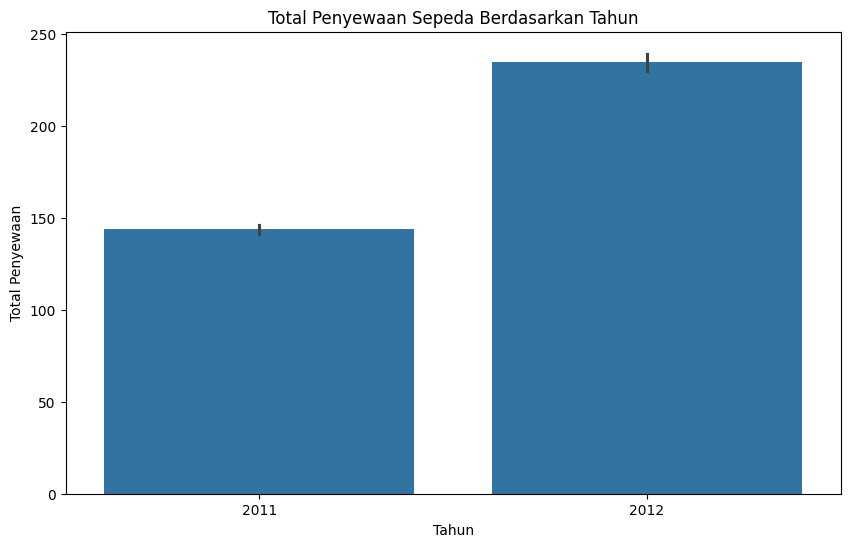

In [38]:
# 1. penggunaan layanan sepeda dari tahun ke tahun
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_df, x='year', y='total_user')
plt.title('Total Penyewaan Sepeda Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penyewaan')
plt.show()

Berdasarkan grafik ini, dapat disimpulkan bahwa penggunaan layanan penyewaan sepeda mengalami pertumbuhan yang pesat dari tahun 2011 ke tahun 2012. Hal ini menunjukkan adanya tren positif dalam penggunaan transportasi yang ramah lingkungan dan sehat.

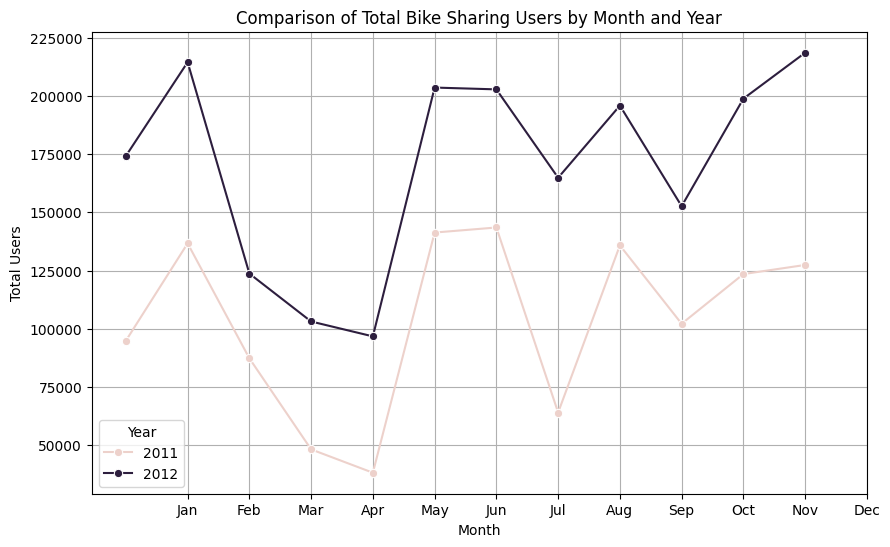

In [39]:
monthly_counts = hour_df.groupby(by=["month", "year"]).agg({
    "total_user": "sum"
})

# Membuat plot dengan seaborn
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_counts, x='month', y='total_user', hue='year', marker='o')

# Menambahkan label dan judul
plt.xlabel('Month')
plt.ylabel('Total Users')
plt.title('Comparison of Total Bike Sharing Users by Month and Year')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)

# Menampilkan plot
plt.show()

Grafik ini memberikan gambaran umum tentang perkembangan penggunaan layanan berbagi sepeda selama dua tahun. Data ini dapat digunakan untuk:

- Menganalisis tren: Melihat tren peningkatan atau penurunan jumlah pengguna dari waktu ke waktu.
- Membandingkan musim: Membandingkan jumlah pengguna pada musim yang berbeda untuk melihat pengaruh faktor musiman.
- Mengevaluasi strategi: Mengevaluasi efektivitas strategi pemasaran atau perubahan kebijakan yang dilakukan oleh penyedia layanan berbagi sepeda.

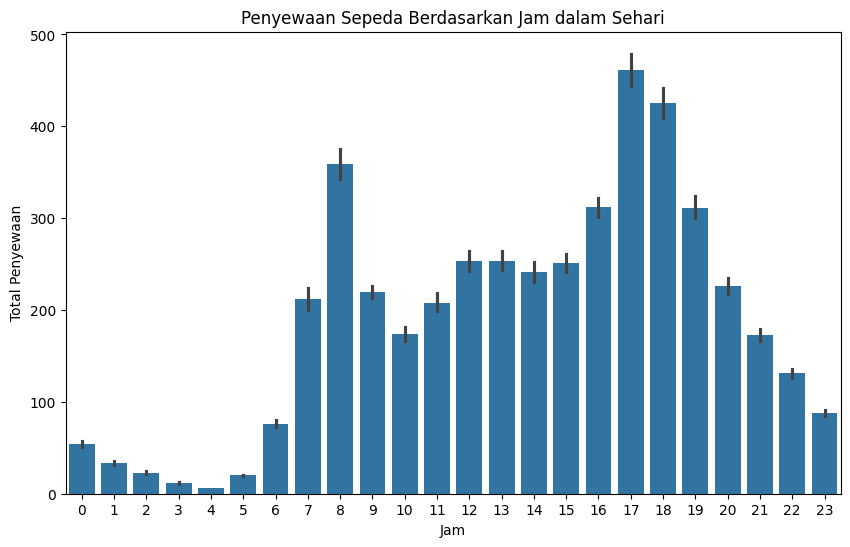

In [40]:
# 2. Pola penggunaan harian (berdasarkan jam dalam sehari)
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_df, x='hour', y='total_user')
plt.title('Penyewaan Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan')
plt.show()

Berdasarkan grafik ini, dapat disimpulkan bahwa penggunaan layanan penyewaan sepeda sangat dipengaruhi oleh waktu dalam sehari. Kebanyakan orang cenderung menyewa sepeda pada siang dan sore hari, terutama saat cuaca cerah dan cocok untuk beraktivitas di luar ruangan. Contohnya pada jam 8 pagi yang dapat kita perkirakan bahwa jam tersebut adalah jam orang berangkat kerja dan pada jam 17 kita perkirakan orang pulang kerja.

In [41]:
hour_df

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,sunday,weekend/holiday,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,springer,2011,january,1,sunday,weekend/holiday,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,springer,2011,january,2,sunday,weekend/holiday,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,springer,2011,january,3,sunday,weekend/holiday,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,springer,2011,january,4,sunday,weekend/holiday,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,springer,2012,december,19,tuesday,working day,mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,springer,2012,december,20,tuesday,working day,mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,springer,2012,december,21,tuesday,working day,clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,springer,2012,december,22,tuesday,working day,clear,0.26,0.2727,0.56,0.1343,13,48,61


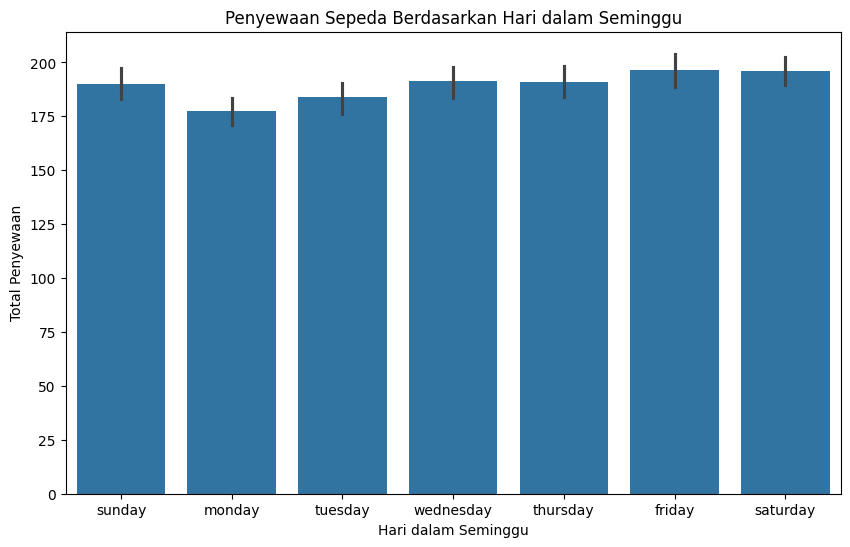

In [42]:
# 3. Pola penggunaan berdasarkan hari-hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_df, x='day', y='total_user')
plt.title('Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Penyewaan')
plt.show()

Berdasarkan grafik ini, dapat disimpulkan bahwa penggunaan layanan penyewaan sepeda cukup merata sepanjang minggu. Artinya, permintaan untuk menyewa sepeda tidak terlalu dipengaruhi oleh hari dalam seminggu.

## Pertanyaan 2 : Apakah faktor cuaca, seperti musim dan suhu udara, memiliki dampak pada penggunaan layanan bike sharing?

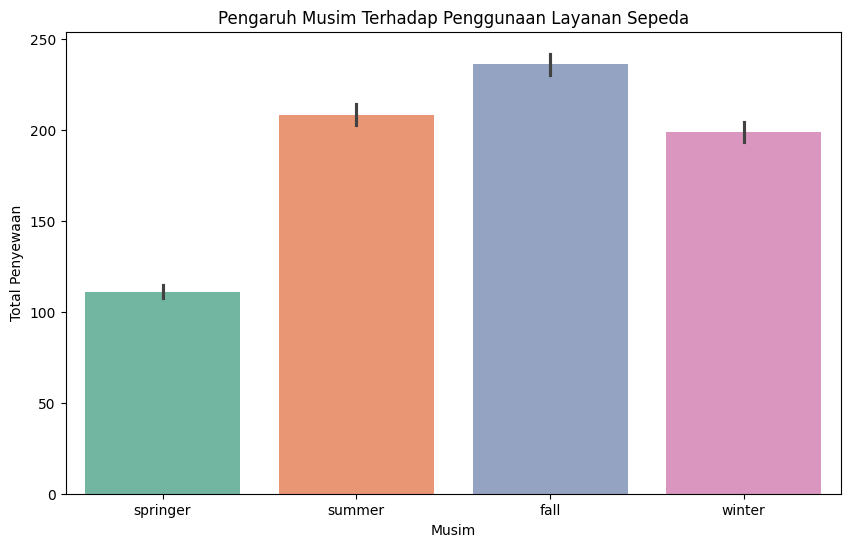

In [43]:
#untuk melihat pengaruh musim (season) terhadap penggunaan layanan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_df, x='season', y='total_user',hue='season', palette='Set2')
plt.title('Pengaruh Musim Terhadap Penggunaan Layanan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.show()

Berdasarkan grafik ini, dapat disimpulkan bahwa musim memiliki pengaruh yang kuat terhadap penggunaan layanan sepeda. Cuaca yang hangat dan cerah cenderung meningkatkan minat masyarakat untuk menyewa sepeda.

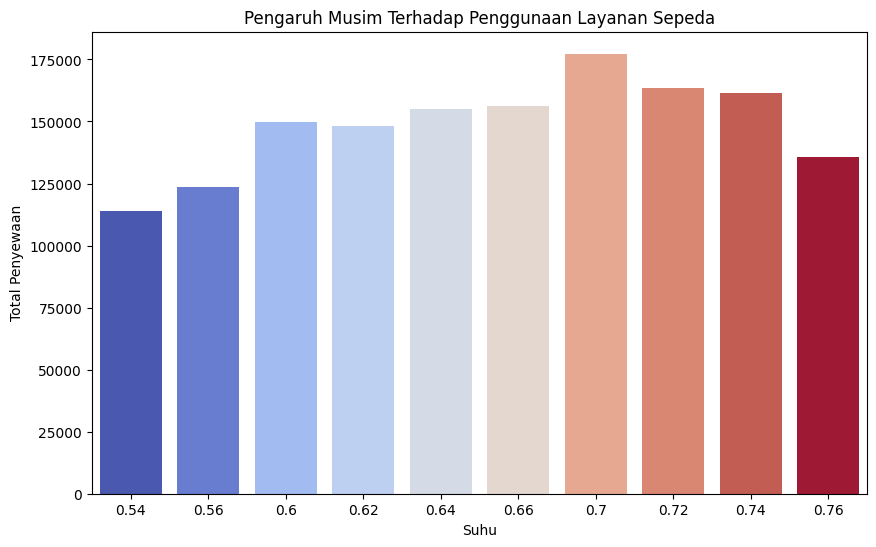

In [44]:
top_10_temp = hour_df.groupby('temperature')['total_user'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_temp, x='temperature', y='total_user',hue='temperature', palette='coolwarm', legend=False)
plt.title('Pengaruh Musim Terhadap Penggunaan Layanan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Total Penyewaan')
plt.show()

Berdasarkan grafik ini, dapat disimpulkan bahwa suhu memiliki pengaruh positif terhadap penggunaan layanan penyewaan sepeda. Ketika cuaca hangat, orang lebih cenderung menyewa sepeda sebagai alat transportasi.

# Analisis lanjutan (opsional)

## Clustering

In [45]:
hour_df['temp_group'] = pd.cut(hour_df['temperature'], bins=[0, 0.3, 0.6, 1], labels=['Dingin', 'Sedang', 'Panas'])

print(hour_df[['temperature', 'temp_group', 'total_user']].sample(frac=0.5))

       temperature temp_group  total_user
4007          0.64      Panas         206
4659          0.70      Panas          25
8548          0.32     Sedang          32
2649          0.52     Sedang         196
12316         0.56     Sedang         332
...            ...        ...         ...
1563          0.44     Sedang          12
15578         0.42     Sedang         525
2977          0.46     Sedang          50
8870          0.42     Sedang         101
6682          0.54     Sedang          30

[8690 rows x 3 columns]


Mengelompokkan suhu berdasarkan interval atau rentang nilai suhu yang akan dibagi ke dalam tiga kelompok:
- 0 hingga 0.3 (dingin)
- 0.3 hingga 0.6 (sedang)
- 0.6 hingga 1 (panas)

# Conclusion


1. Pertanyaan 1 : Bagaimana tren penggunaan layanan bike sharing selama beberapa tahun terakhir, serta bagaimana pola penggunaannya berdasarkan waktu dan hari dalam seminggu?

Penggunaan layanan sepeda memperlihatkan pola yang signifikan berdasarkan waktu dalam sehari dan hari-hari dalam seminggu. Penyewaan sepeda memuncak selama jam-jam sibuk pagi dan sore, menunjukkan bahwa banyak pengguna menggunakan sepeda untuk perjalanan sehari-hari, seperti pergi dan pulang kerja. Selain itu, penyewaan sepeda tetap stabil sepanjang minggu, dengan sedikit peningkatan pada hari kerja dibandingkan dengan akhir pekan.


2. Pertanyaan 2 : Apakah faktor cuaca, seperti musim dan suhu udara, memiliki dampak pada penggunaan layanan bike sharing

Faktor cuaca, terutama suhu, mempengaruhi penggunaan sepeda. Penyewaan sepeda cenderung meningkat saat suhu lebih hangat, dengan puncak pada suhu sedang hingga tinggi. Sebaliknya, penggunaan sepeda menurun saat suhu lebih dingin. Selain itu, musim juga berperan, di mana penyewaan sepeda lebih tinggi di musim panas dan gugur dibandingkan dengan musim dingin atau semi.

In [46]:
day_df.to_csv('day_df_new.csv', index=False)
hour_df.to_csv('hour_df_new.csv', index=False)

In [48]:
day_df.groupby(by='year').agg({'temperature' : 'mean'}).loc[2011,'temperature']


np.float64(0.48666494904109586)